<a href="https://colab.research.google.com/github/eirikngard/GEO4902/blob/master/read_nc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [ ]:
import xarray as xr 
#add som text as a test

url='https://thredds.met.no/thredds/dodsC/metusers/oskaral/MSc-Eirik/GreaterOsloArea/pr_NorCP_AROME_ECE_ALADIN_1985-2005_15MIN.nc'
dataset = xr.open_dataset(url)


In [ ]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    latlon_idx = np.argmin(c)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [ ]:
[ix,jx] = findindex(dataset.lat,dataset.lon,66.503,26.150) # Close to Slottet

pr = dataset.pr[:,ix,jx]

In [ ]:
pr

<xarray.DataArray 'pr' (time: 736320)>
[736320 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1985-01-01T00:15:00 ... 2006-01-01
    x        float64 7.35e+05
    y        float64 1.029e+06
    lon      float32 11.186805
    lat      float32 60.064682
Attributes:
    standard_name:  precipitation_amount
    long_name:      Accumulated Precipitation
    units:          kg m-2
    grid_mapping:   Lambert_Conformal
    FA_name:        TOT.WATER.PRECIP
    par:            61.0
    lvt:            105
    lev:            0
    tri:            4
    cell_methods:   time: sum
    _ChunkSizes:    [ 1 15 18]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'extemd'


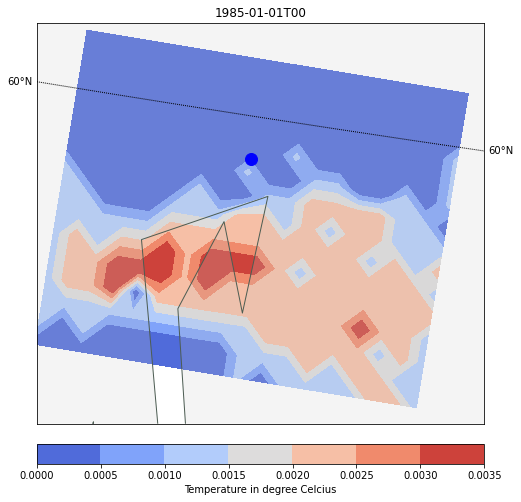

In [36]:
from mpl_toolkits.basemap import Basemap

timestep=24


fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='l', 
            llcrnrlat= 59.6, urcrnrlat=60.15, llcrnrlon=10.3, urcrnrlon=11.2)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(np.array(dataset.lon),np.array(dataset.lat))               # compute map proj coordinates.

cs=m.contourf(x,y,np.array( dataset.pr[10000,:,:]),cmap=plt.cm.coolwarm,extemd='max')#timeste på første :
plt.title (np.datetime_as_string(dataset.time[0],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Temperature in degree Celcius')

lon = 10.7
lat = 59.95
x,y = m(lon, lat)
m.plot(x, y, 'bo', markersize=12)

test 
